# Lending Club Case Study - Exploratory Data Analysis

### Group Members
1. Piyush Choudhari 
2. Abhishek 

### Problem Statement

Lending club is currently facing challenges with their loan approval/declines process. This case study involves performing exploratory data analysis (EDA) to identify patterns in consumer attributes and loan characteristics that might be strong indicators of loan default. Based on the loan default patterns, we can take business decisions minimizing the risk associated with the loan. 

There are majorly two types of risks that can be minimized: 
1. When the customer will not default on the loan but the loan is not approved - risk losing revenue 
2. WHen the customer will default on the loan but the loan is approved - risk of losing capital 
    



### Business Objective

Loan default is the largest financial loss to a financial lending company. Our objective is to analyze customer and loan attributes and identify patterns that indicate a strong possibility of default. 

### Importing libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 1000000)
pd.set_option("display.max_rows", 1000000)

In [2]:
df = pd.read_csv('loan.csv', encoding = "ISO-8859-1", low_memory=False)
print("Rows:", df.shape[0], "| Columns: ", df.shape[1])
df.head()

Rows: 39717 | Columns:  111


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Initial Obervations**:
1. Looking at the data, we see a lot of columns which are redundant or irrelevant.  We can drop these columns after the null check step. 
2. Columns such as term, int_rate, emp_length, revolve_util etc would have to be cleaned as they contain unwanted characters such as "%" and "+" 

### Data Cleaning


Checking for **Null** Values

In [3]:
df_null = df.isnull().sum().reset_index().sort_values(by = 0, ascending = False)
df_null.columns = ['Variable', 'no_of_nulls']
df_null['percentage_null'] = df_null['no_of_nulls']/df.shape[0]
df_null

,Variable,no_of_nulls,percentage_null
55,verification_status_joint,39717,1.000000
53,annual_inc_joint,39717,1.000000
81,mo_sin_old_rev_tl_op,39717,1.000000
80,mo_sin_old_il_acct,39717,1.000000
77,bc_util,39717,1.000000
76,bc_open_to_buy,39717,1.000000
75,avg_cur_bal,39717,1.000000
74,acc_open_past_24mths,39717,1.000000
73,inq_last_12m,39717,1.000000
72,total_cu_tl,39717,1.000000


Seems like there are a lot of columns with all rows as null. We will drop all columns with % null over 60%. 

In [4]:
drop_list = df_null[df_null['percentage_null'] >= 0.6].Variable.tolist()
df = df.drop(drop_list, axis = 1)

Seems like the information in the "desc" column is already summarized in a neat format in the "Purpose" column. so we will drop the columns "desc" 

In [5]:
df = df.drop(['desc'], axis = 1)

Checking the remaining columns with null values

In [6]:
df_null[(~df_null['Variable'].isin(drop_list + ['desc'])) & (df_null['percentage_null'] > 0)]

,Variable,no_of_nulls,percentage_null
10,emp_title,2459,0.061913
11,emp_length,1075,0.027066
105,pub_rec_bankruptcies,697,0.017549
45,last_pymnt_d,71,0.001788
49,collections_12_mths_ex_med,56,0.001410
78,chargeoff_within_12_mths,56,0.001410
33,revol_util,50,0.001259
106,tax_liens,39,0.000982
21,title,11,0.000277
48,last_credit_pull_d,2,0.000050


On checking these columns, and refering to the data dictionaries, we can remove the following columns as they will not be used in the analysis - emp_title, last_pymnt_d, collections_12_mths_ex_med, revol_util, title, last_credit_pull_d. 

In addition, tax_linen and public bankrupcy columns have only 1 unique value. These can be dropped too. 

In [7]:
df = df.drop(['emp_title', 'last_pymnt_d', 'collections_12_mths_ex_med', 'revol_util', 'title', 'last_credit_pull_d', 'tax_liens', 'chargeoff_within_12_mths'], axis = 1)

Now for remaining rows will null data, we will check how many rows we will lose if we drop these. 

In [8]:
df_null_1 = df.isnull().sum().reset_index().sort_values(by = 0, ascending = False)
df_null_1.columns = ['Variable', 'no_of_nulls']
df_null_1 = df_null_1[df_null_1['no_of_nulls'] > 0]
print("Rows in df before dropping any rows: ", df.shape[0])
print("Rows in df after dropping rows: ", df.dropna(subset = list(df_null_1.Variable.tolist())).shape[0])
print("Percentage difference :", round(100*(df.shape[0] - df.dropna(subset = list(df_null_1.Variable.tolist())).shape[0])/df.shape[0], 2), "%")

Rows in df before dropping any rows:  39717
Rows in df after dropping rows:  37945
Percentage difference : 4.46 %


Since we are not losing a high number of rows, we will drop the rows based on missing values from these columns 

In [9]:
df = df.dropna(subset = list(df_null_1.Variable.tolist()))

In [10]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prnc

We have retained 95% data now removing all null values. Further, we can drop redundant columns based on the data dictionary and data in the columns. For example, some columns have only one value for all rows. we will take a look at these columns 

In [11]:
df.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
int_rate                     337
earliest_cr_line             514
zip_code                     809
loan_amnt                    870
funded_amnt                 1032
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1277
collection

Based on the above distribution, we can drop acc_now_delinq, application_type, policy_code, initial_list_status, 
delinq_amnt, pymnt_plan. Since they have only 1 value and won't be consequential for our analysis.  

Further, we can remove other redundant and irrelevant columns such as member_id, url, zip_code etc. 
Example, columns such as collection_recovery_fee are only for Charged off loans (defaults). It will not help us distinguish between defaults vs non defaults. 

In [12]:
df = df.drop(['acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status', 'delinq_amnt', 'pymnt_plan', 'member_id', 'url', 'zip_code', 'earliest_cr_line', 
             'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'revol_bal',
              'total_acc', 'out_prncp', 'out_prncp_inv', 'collection_recovery_fee'
             ], axis = 1)

In [13]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,recoveries,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,1,3,0,0.00,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,5,3,0,117.08,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,2,0,0.00,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,1,10,0,0.00,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,0,15,0,0.00,0.0


### Data Conversion and checking for outliers distributions

Checking the datatype of the columns

In [14]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
recoveries              float64
pub_rec_bankruptcies    float64
dtype: object

**Observation** - Columns term, int_rate need to be cleaned. 
columns - issue_d can be formatted to datetime

In [15]:
df['term'] = df['term'].str.replace('months', '').astype(int)
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['issue_d'] = pd.to_datetime(df['issue_d'],  format='%b-%y')

**Creating a new column "Loan_paid"** - Based on loan status to indicate 1 or 0 if the customer has defaulted on this loan or not

In [16]:
df.groupby(['loan_status'])['id'].count()

loan_status
Charged Off     5281
Current         1098
Fully Paid     31566
Name: id, dtype: int64

In [17]:
df['default_flag'] = df['loan_status'].map(lambda x:1 if x == 'Charged Off' else 0)
df.groupby(['default_flag'])['id'].count()

default_flag
0    32664
1     5281
Name: id, dtype: int64

**Outlier Check**
Checking outlier in columns - loan_amnt, funded_amnt, funded_amnt_inv, int_rate, annual_inc, dti

In [18]:
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti
count,37945.000000,37945.000000,37945.000000,37945.000000,3.794500e+04,37945.000000
mean,11316.141784,11038.908947,10604.233768,12.078367,6.960945e+04,13.370784
std,7478.772560,7206.799900,7113.791153,3.735070,6.361049e+04,6.658022
min,500.000000,500.000000,0.000000,5.420000,4.000000e+03,0.000000
25%,5550.000000,5500.000000,5000.000000,9.320000,4.160400e+04,8.260000
50%,10000.000000,10000.000000,9150.000000,11.860000,6.000000e+04,13.460000
75%,15000.000000,15000.000000,14576.592640,14.650000,8.323600e+04,18.630000
max,35000.000000,35000.000000,35000.000000,24.590000,6.000000e+06,29.990000


**Observation** - Out of all the columns, it seems like there are a lot of outliers in the annual_inc column. 
we will check these outliers
(We will use the same code in EDA section to get insights from the data)

In [19]:
display(df.annual_inc.quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]))
print("Number of rows with annual_inc outliers: ", df[df['annual_inc'] > df['annual_inc'].quantile(0.96)].shape[0], "out of", df.shape[0] )

0.25      41604.0
0.50      60000.0
0.75      83236.0
0.90     117000.0
0.95     143468.0
0.96     150000.0
0.97     167776.0
0.98     189000.0
0.99     235000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

Number of rows with annual_inc outliers:  1507 out of 37945


Seems like there is a steep jump after 97th percentile of the data. 
we will remove these rows. From the counts, we would lose 1321 rows which is ~3% of data

In [20]:
df = df[df['annual_inc'] <= df['annual_inc'].quantile(0.96)]

<Axes: >

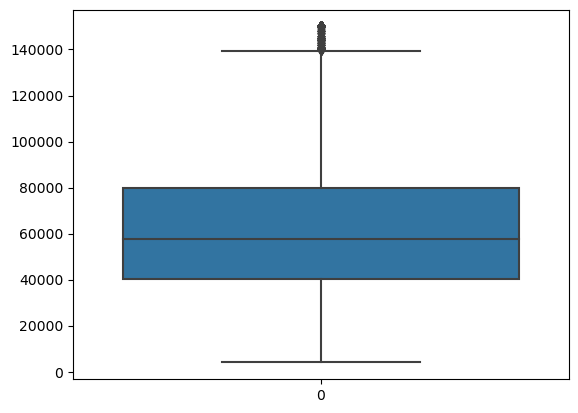

In [21]:
sns.boxplot(df['annual_inc'])

### EDA - Univariate

Checking the distribution of **Quantitative variables** using a boxplot to check the distribution of data

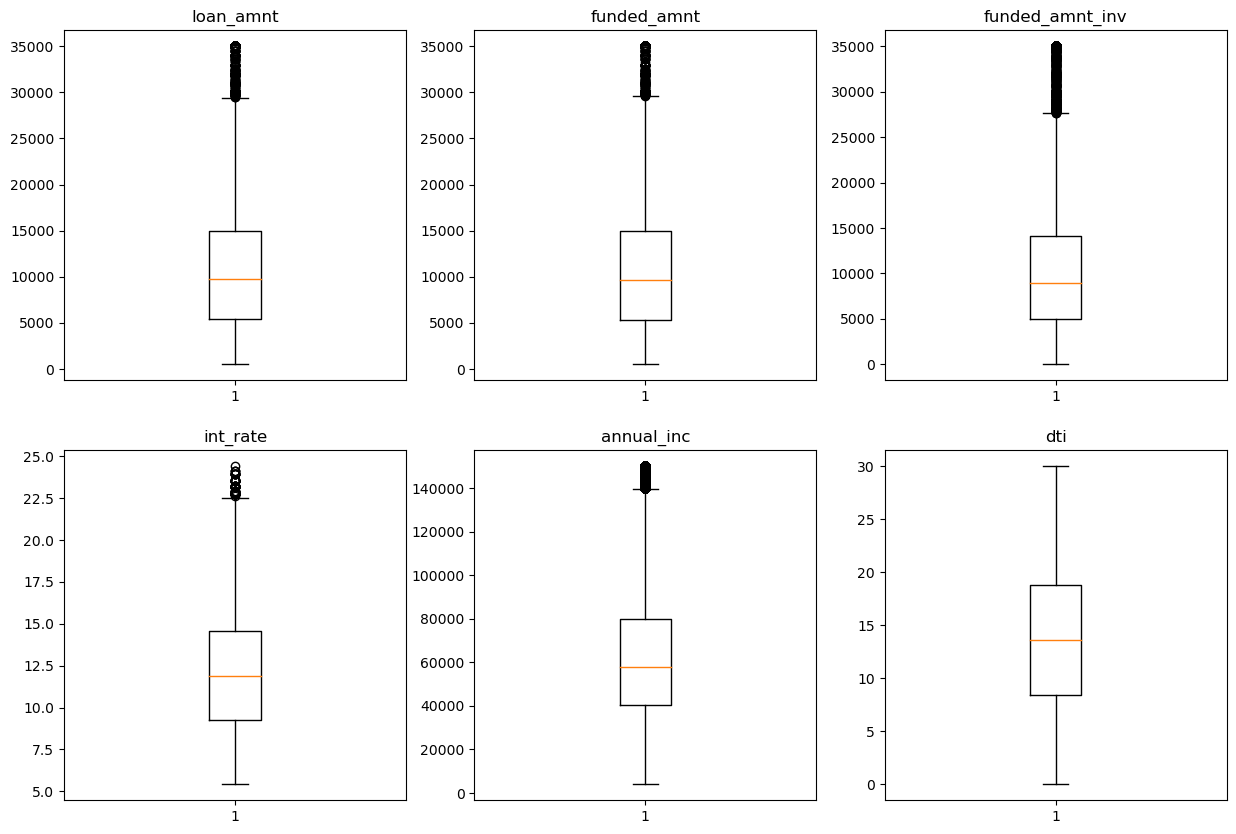

In [22]:
# Plotting these 6 variables in a 3,2 matrix
x = 2
y = 3
columns = [['loan_amnt', 'funded_amnt', 'funded_amnt_inv'], ['int_rate', 'annual_inc', 'dti']]
fig, ax = plt.subplots(x, y, figsize = (15, 10))
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot(df[columns[i][j]])
        ax[i,j].set_title(columns[i][j])      

**Observation** :
The median loan amount is around 9500 indicating that the data has few rows with high loan amounts. 
The median interest rate seems to be between 11 and 12.5. 



Distribution of the variables

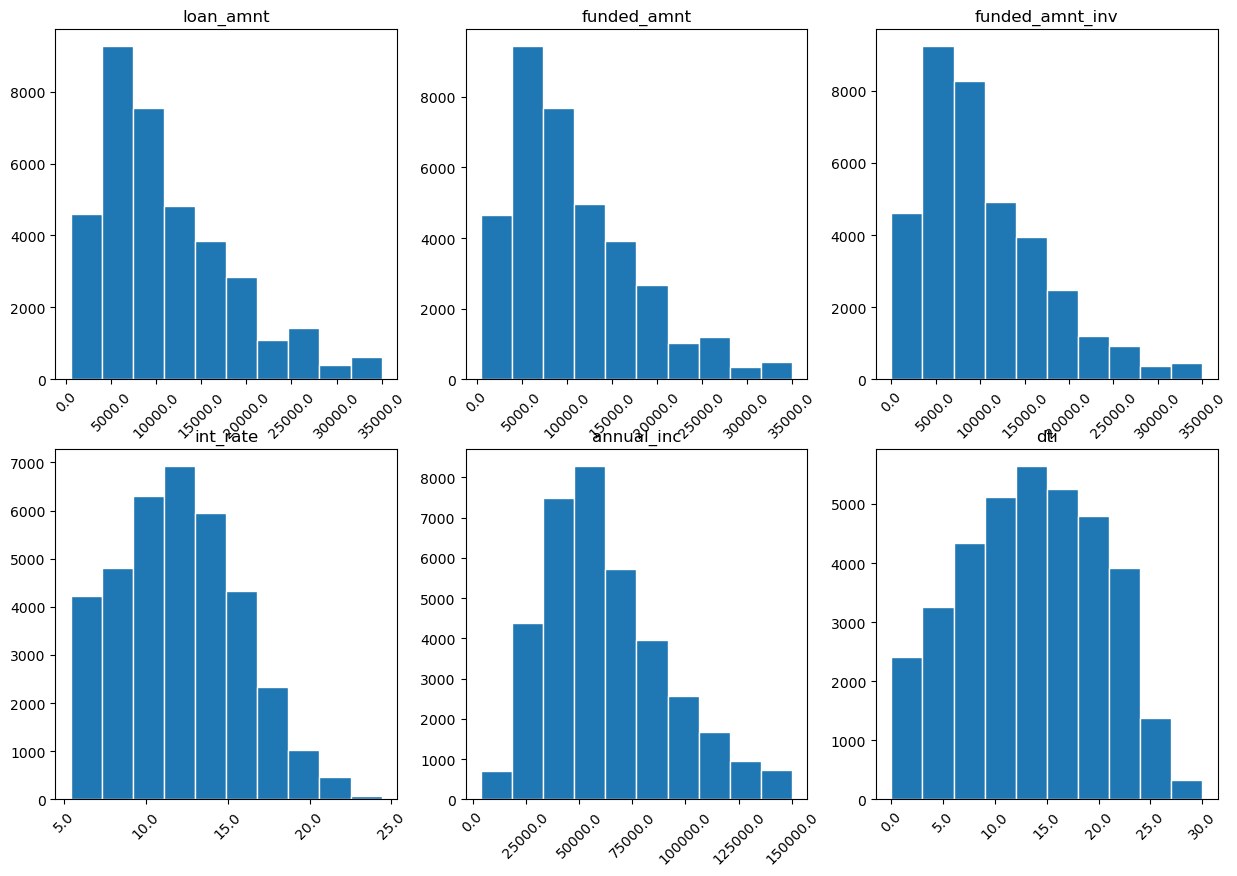

In [23]:
# Plotting these 6 variables in a 3,2 matrix
x = 2
y = 3
columns = [['loan_amnt', 'funded_amnt', 'funded_amnt_inv'], ['int_rate', 'annual_inc', 'dti']]
fig, ax = plt.subplots(x, y, figsize = (15, 10))
for i in range(2):
    for j in range(3):
        p, bins, _ = ax[i,j].hist(df[columns[i][j]], edgecolor = 'w', bins = 10)
        ax[i,j].set_title(columns[i][j])
        ax[i,j].set_xticklabels(ax[i,j].get_xticks(), rotation=45)
        
plt.show()        




**Observations**
- The curves above almost look like a bell curve with a long tails towards the right. 
- Most customers have theur incomes between 25K to 60K. With fewer customers with high income (100K+ )
- most customers have received an interest rate between 11 - 12.5%
- Majority of the customers have taken a loan amount between 5K - 11K


**Checking the distribution of categorical variables using countplot**

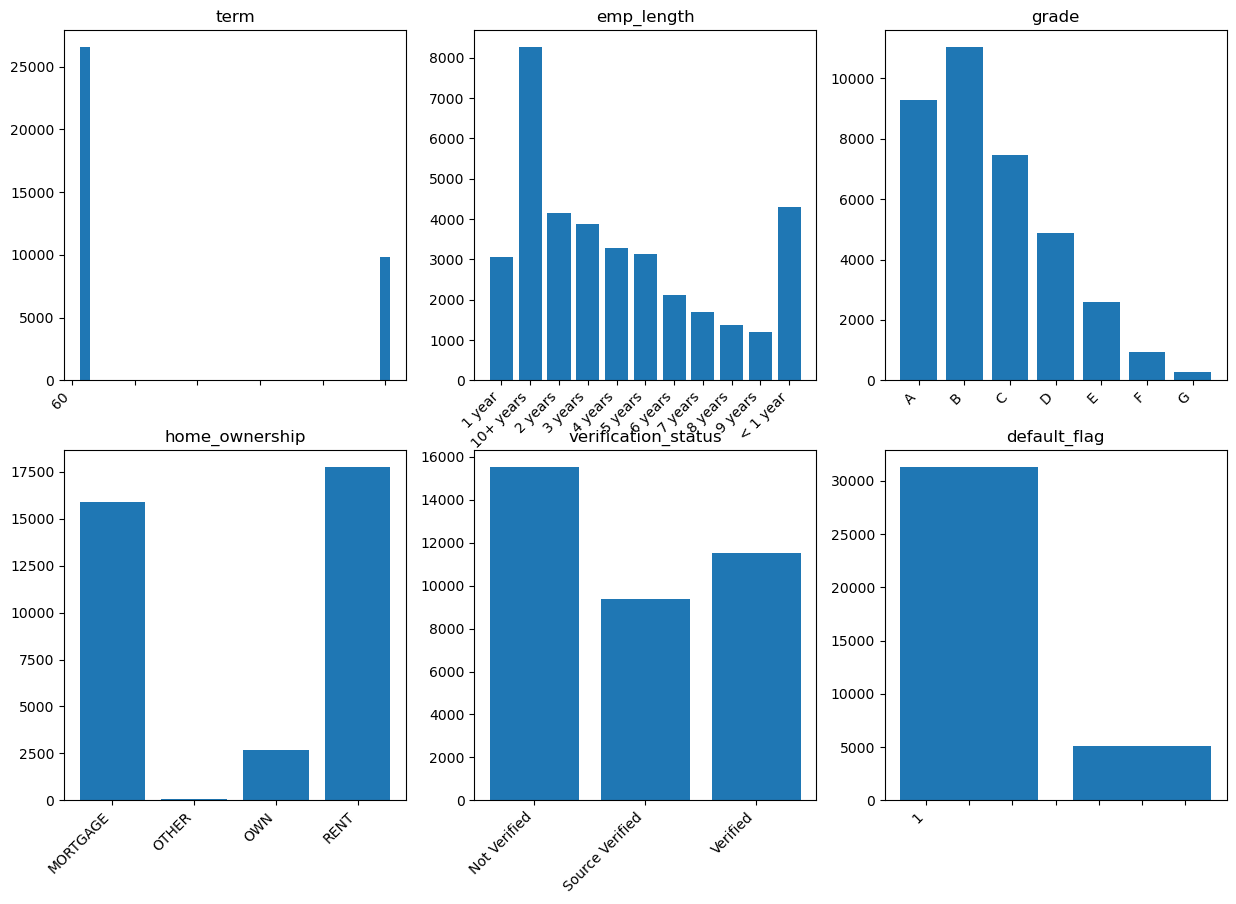

In [24]:
x = 2
y = 3
columns = [['term', 'emp_length', 'grade'], ['home_ownership', 'verification_status','default_flag']]
fig, ax = plt.subplots(x, y, figsize = (15, 10))
for i in range(2):
    for j in range(3):
        ax[i,j].bar(df.groupby([columns[i][j]]).count()['id'].index, df.groupby([columns[i][j]]).count()['id'].values)
        ax[i,j].set_title(columns[i][j])      
        ax[i,j].set_xticklabels(labels = df.groupby([columns[i][j]]).count()['id'].index, rotation=45, ha='right')
plt.show()

**Observations** 
- Majority loans are in the data are of grade B
- Most loan applicatants have 10+ years of employment. With < 1 year being the second highest number.
- Very few loan applicants own a home. Majority are on Rent or are paying mortgage for their homes. 

**Checking the purpose of the loan**

Text(0.5, 1.0, 'Count of loans taken for each purpose')

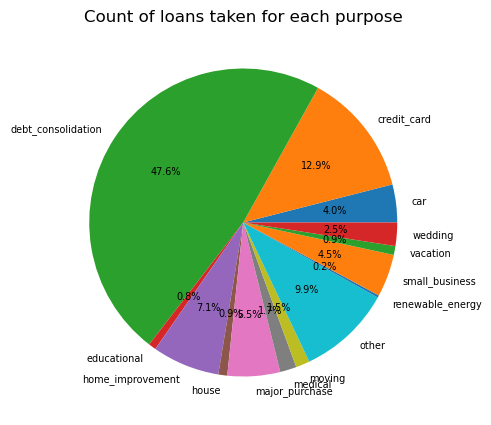

In [25]:
plt.figure(figsize = (9,5))
plt.pie(df.groupby(['purpose'])['id'].count().values , labels = df.groupby(['purpose'])['id'].count().index, autopct='%1.1f%%', textprops={'fontsize': 7})
plt.title('Count of loans taken for each purpose')

**Observation** - Most loans are taken for debt_consolidation. I.E to combine all loans into a single loan with objective of having a lower interest rate. 

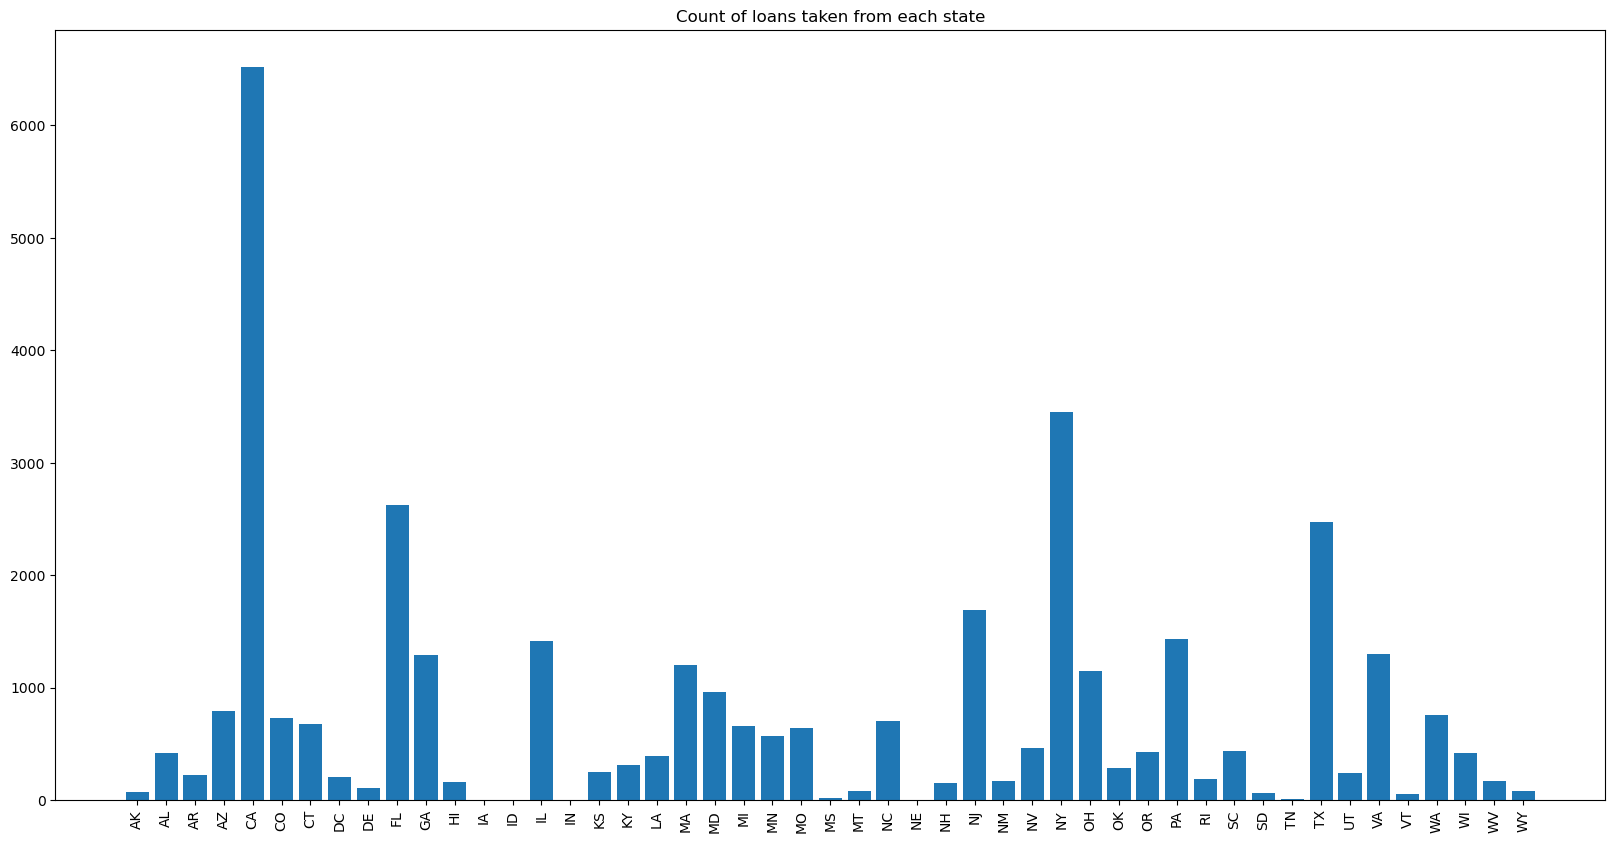

In [26]:
plt.figure(figsize = (20, 10))
plt.bar(df.groupby(['addr_state'])['id'].count().index, df.groupby(['addr_state'])['id'].count().values)
plt.title('Count of loans taken from each state')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

**Observations**
- Count of loans are highest in states that have big cities like California, New York and Texas

**Checking which quarter had the maximum number of loans**

Text(0, 0.5, 'Count of loans')

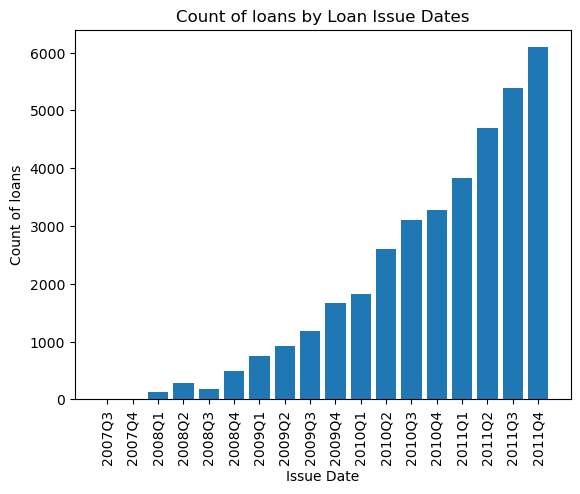

In [31]:
# Getting Year and quarter from issue_d column
df['issue_q'] = df['issue_d'].map(lambda x:str(x.year) + "Q" + str(x.quarter))
plt.bar(df.groupby(['issue_q']).count()['id'].index, df.groupby(['issue_q']).count()['id'].values)
plt.xticks(rotation = 90)
plt.title("Count of loans by Loan Issue Dates")
plt.xlabel("Issue Date")
plt.ylabel("Count of loans")

**Observation** 
- The data starts form 2007Q3 and goes until 2011Q4
- In each year, the highest number of loans were issued in Q4
- The count of loans have progressively increased 

### Bivariate

**Bivaraite on quantitative variables**
- Plotting the above quantitative variables VS our target variable - Default_flag
Below plots give the % default in each bin of our quantitative variable. This will help us normalize for the volume,
and see if default proportion is high in a particular segment of values

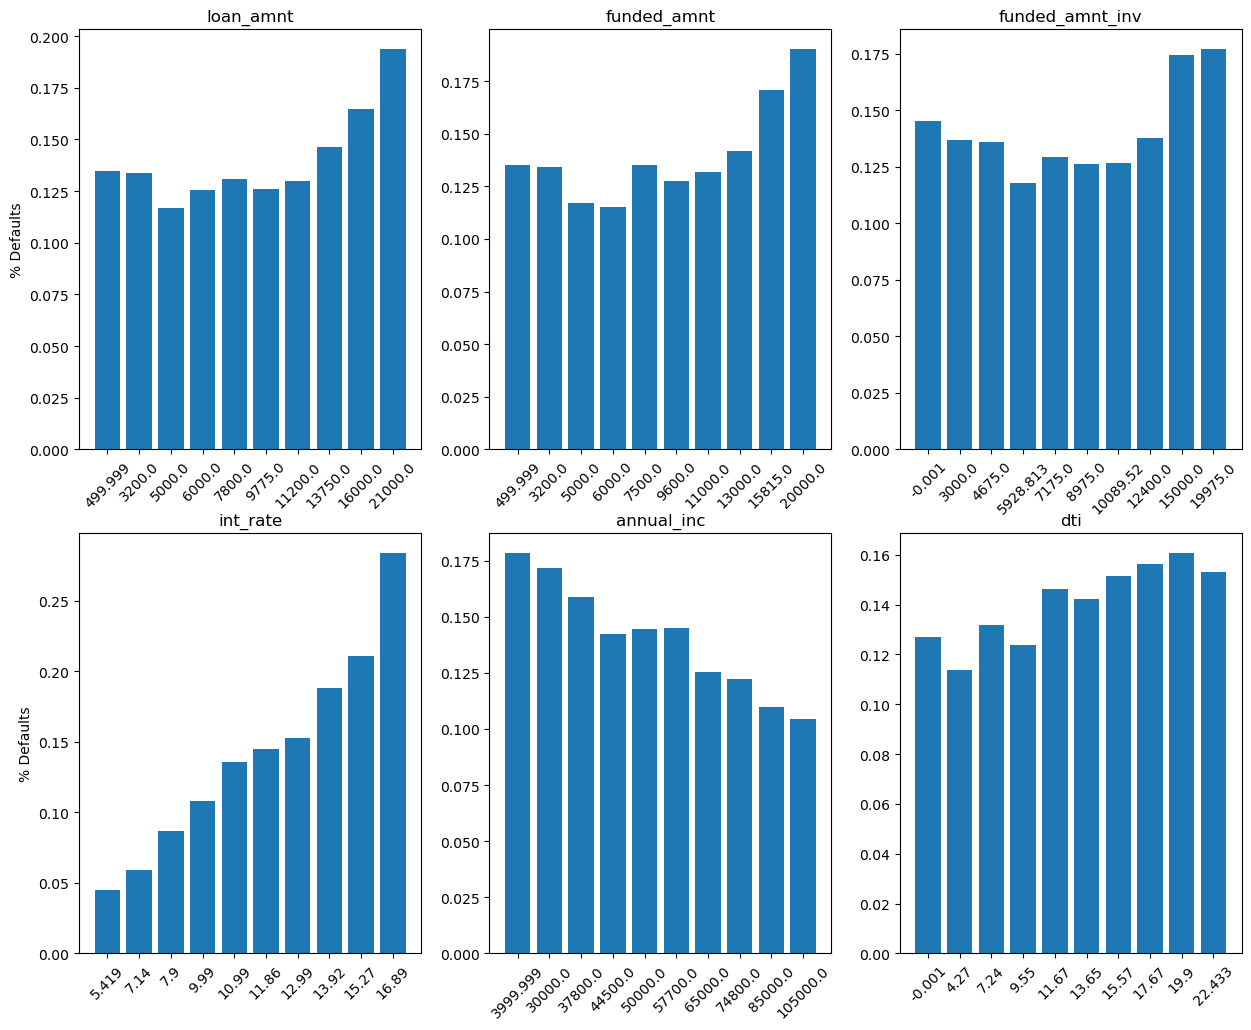

In [102]:
# Plotting these 6 variables in a 3,2 matrix
x = 2
y = 3
columns = [['loan_amnt', 'funded_amnt', 'funded_amnt_inv'], ['int_rate', 'annual_inc', 'dti']]
fig, ax = plt.subplots(x, y, figsize = (15, 12))
for i in range(2):
    for j in range(3):
        
        bins = pd.qcut(df[columns[i][j]], q=10, duplicates='drop')
        bin_edges = bins.cat.categories 
        labels = [f"{interval.left}" for interval in bin_edges]
        df[columns[i][j] + "_bins"] = pd.qcut(df[columns[i][j]], q=10, labels=labels)

        x_values = df.groupby([columns[i][j] + '_bins'])['default_flag'].mean().index
        y_values = df.groupby([columns[i][j] + '_bins'])['default_flag'].mean().values
        ax[i,j].bar(x_values, y_values)
        ax[i,j].set_title(columns[i][j])
        if j == 0:
            ax[i,j].set_ylabel("% Defaults")
        ax[i,j].set_xticklabels(labels = x_values, rotation = 45)

**Observation-** 
**Some really interesting trends are spotted:**
- Defaults are higher in customers with low annual income VS customers with higher annual income. 
- Defaults are high when the intest rate is high. 
- The debt to income ratio seems to be a good predictor of defaults 
- Intuitively, the higher the loan amounts, higher are the defaults. 

**Checking the months of issue of loans between 2009 to 2011**

In [103]:
#Creating a quarter with columns
df['issue_q'] = str(df['issue_d'].dt.year) + "Q" + str(df['issue_d'].dt.quarter)


In [104]:
df['issue_d'].dt.quarter

0        4
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       4
15       4
16       4
17       4
18       4
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       4
27       4
28       4
29       4
30       4
31       4
32       4
33       4
34       4
35       4
36       4
37       4
38       4
39       4
40       4
41       4
42       4
43       4
44       4
45       4
46       4
47       4
48       4
49       4
50       4
51       4
52       4
53       4
54       4
55       4
56       4
57       4
58       4
59       4
60       4
61       4
62       4
63       4
64       4
65       4
66       4
67       4
68       4
69       4
70       4
71       4
72       4
73       4
74       4
75       4
76       4
77       4
78       4
79       4
80       4
81       4
82       4
83       4
84       4
85       4
86       4
87       4
88       4
89       4
90       4

**Bivariate on Categorical Variables**

Plotting the above Categorical variables VS our target variable - Default_flag 

In [105]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,recoveries,pub_rec_bankruptcies,default_flag,loan_amnt_bins,funded_amnt_bins,funded_amnt_inv_bins,int_rate_bins,annual_inc_bins,dti_bins,issue_q
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,3,0,0.00,0.0,0,3200.0,3200.0,4675.0,9.99,3999.999,22.433,0 2011\n1 2011\n2 2011\n3...
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,3,0,117.08,0.0,1,499.999,499.999,-0.001,13.92,3999.999,-0.001,0 2011\n1 2011\n2 2011\n3...
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,2,0,0.00,0.0,0,499.999,499.999,-0.001,15.27,3999.999,7.24,0 2011\n1 2011\n2 2011\n3...
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,10,0,0.00,0.0,0,9775.0,9600.0,8975.0,12.99,44500.0,19.9,0 2011\n1 2011\n2 2011\n3...
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,0,15,0,0.00,0.0,0,499.999,499.999,-0.001,11.86,74800.0,17.67,0 2011\n1 2011\n2 2011\n3...


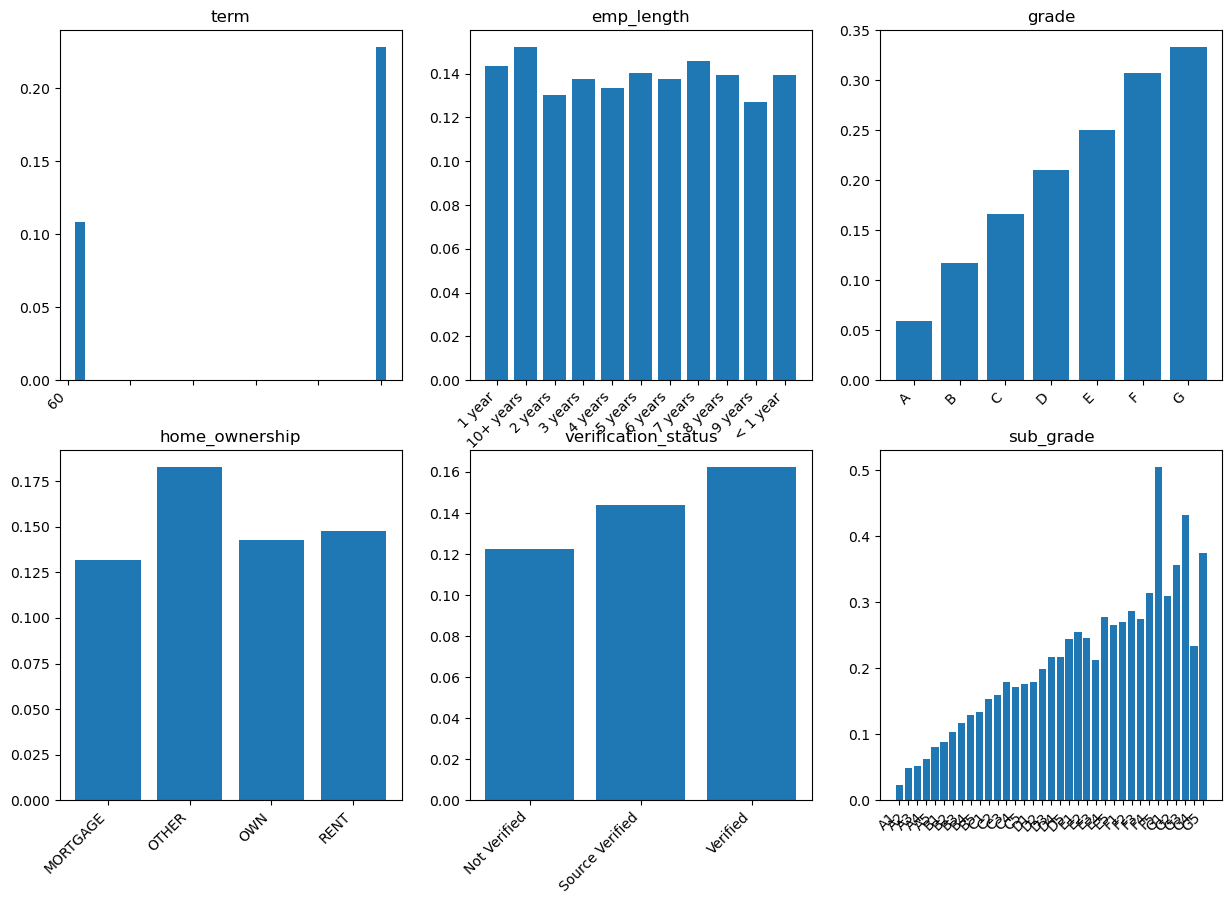

In [106]:
x = 2
y = 3
columns = [['term', 'emp_length', 'grade'], ['home_ownership', 'verification_status','sub_grade']]
fig, ax = plt.subplots(x, y, figsize = (15, 10))
for i in range(2):
    for j in range(3):
        ax[i,j].bar(df.groupby([columns[i][j]]).mean()['default_flag'].index, df.groupby([columns[i][j]]).mean()['default_flag'].values)
        ax[i,j].set_title(columns[i][j])      
        ax[i,j].set_xticklabels(labels = df.groupby([columns[i][j]]).count()['id'].index, rotation=45, ha='right')
plt.show()

**Observations**
- As expected, Grade G has the highest % of defaults. Grade is the rating provided to the loan 
- surprisingly, Verified customers have higher loan defaults than non verified

**Checking the %defaults by the purpose of the loan**

[]

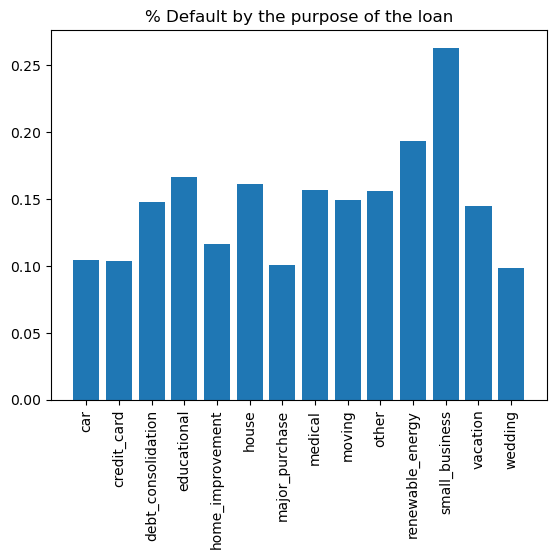

In [107]:
plt.bar(df.groupby(['purpose'])['default_flag'].mean().index, df.groupby(['purpose'])['default_flag'].mean().values)
plt.title("% Default by the purpose of the loan")
plt.xticks(rotation = 90)
plt.plot()

**Observation**
1. Loans taken for small businesses have the highest default rate

**Checking the default rate by State**

[]

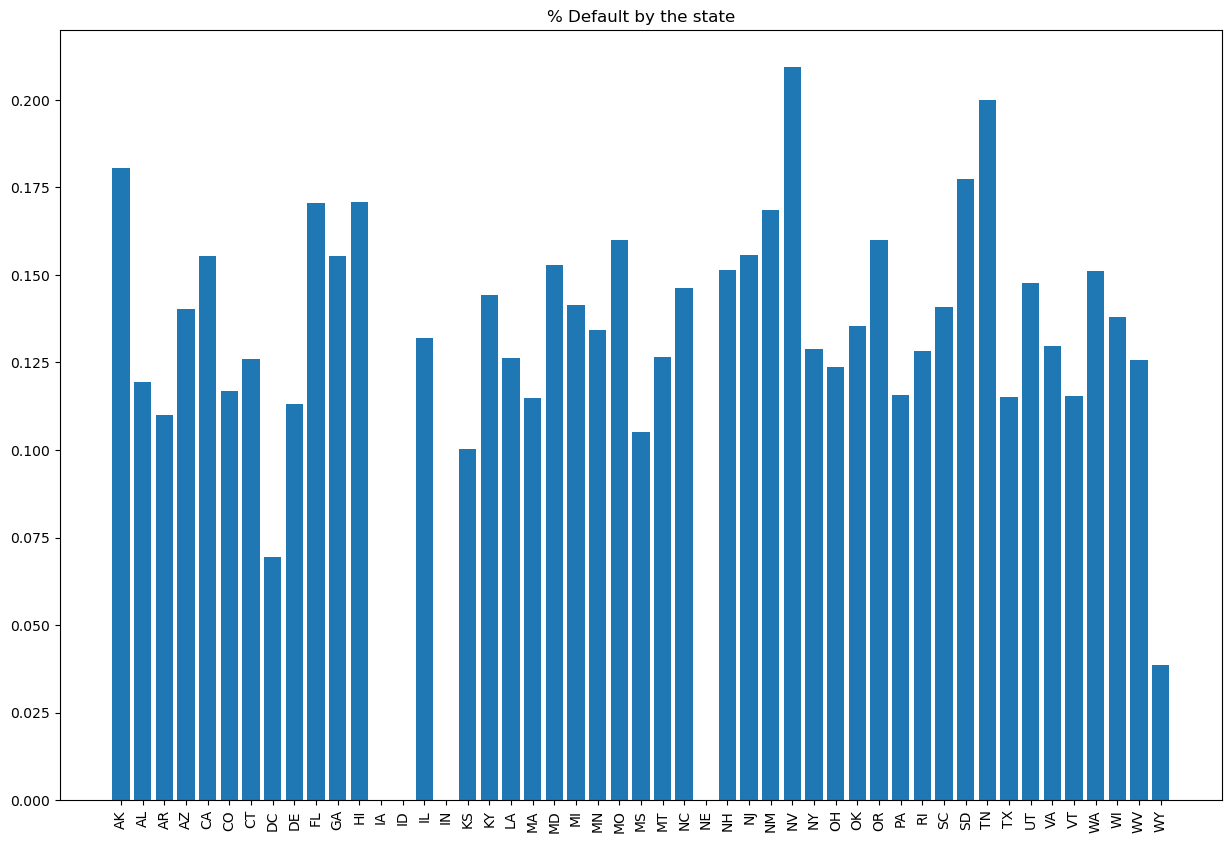

In [108]:
plt.figure(figsize = (15,10))
plt.bar(df.groupby(['addr_state'])['default_flag'].mean().index, df.groupby(['addr_state'])['default_flag'].mean().values)
plt.title("% Default by the state")
plt.xticks(rotation = 90)
plt.plot()

**Observation** - Nevada has the highest default rate of all

**Checking if pub_rec_bankruptcies and delinq_2yrs shows any pattern/trend with our target - %default**

Text(0.5, 0, '# Public Bankrupcies ')

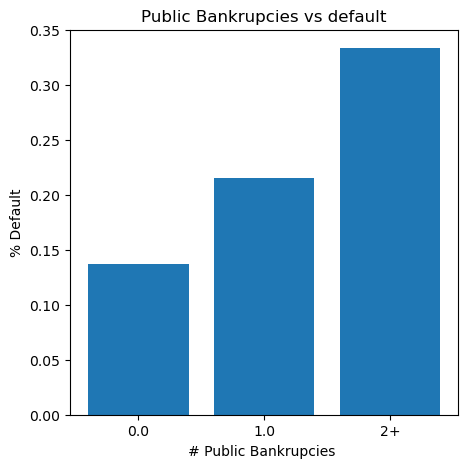

In [109]:
df['pub_rec_bankruptcies_bucket'] = df['pub_rec_bankruptcies'].map(lambda x: str(x) if x < 2 else '2+')
plt.figure(figsize = (5, 5))
plt.bar(df.groupby(['pub_rec_bankruptcies_bucket'])['default_flag'].mean().index, df.groupby(['pub_rec_bankruptcies_bucket'])['default_flag'].mean().values)
plt.title("Public Bankrupcies vs default")
plt.ylabel("% Default")
plt.xlabel("# Public Bankrupcies ")

**Observation** - Higher Number of bankrupcies lead to higher probability of default

Text(0.5, 0, '# Delinquencies in last 2 years ')

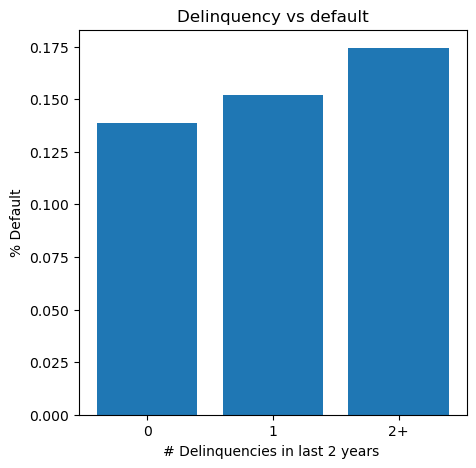

In [37]:
df['delinq_2yrs_bucket'] = df['delinq_2yrs'].map(lambda x: str(x) if x < 2 else '2+')
plt.figure(figsize = (5, 5))
plt.bar(df.groupby(['delinq_2yrs_bucket'])['default_flag'].mean().index, df.groupby(['delinq_2yrs_bucket'])['default_flag'].mean().values)
plt.title("Delinquency vs default")
plt.ylabel("% Default")
plt.xlabel("# Delinquencies in last 2 years ")

**Observation** - More Delinquency in the last 2 years more is the Default probability

**Checking if there is a correlation in quantative variables**

<Axes: >

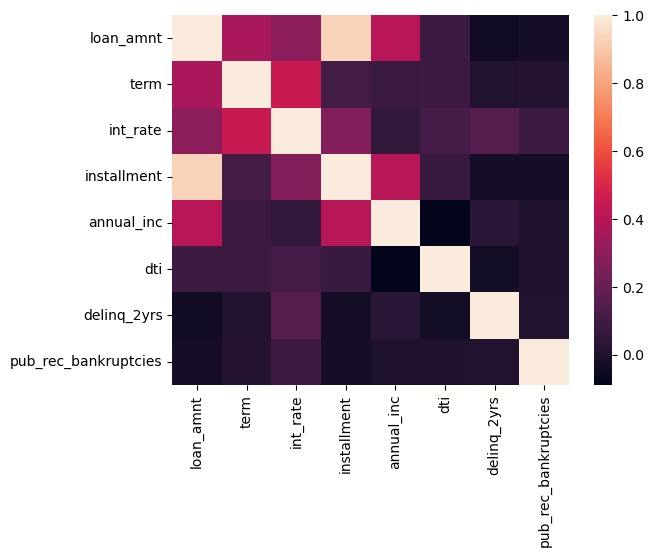

In [36]:
sns.heatmap(df[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'pub_rec_bankruptcies']].corr())

Installment is highly correlated to the Loan Amnt

### Summary and findings

From the **univariate analysis**, we saw that:
- Most loan Amounts are between 5K to 10K
- Most of the customers have an annual income of 50K - 60K
- Customers usually get an interest rate of 11% - 13% on their loans
- The most common reason why the loan is taken is Debt Consolidation
- Majority of our customers are from California, and on the second place we have New York, Indicating that our customers are highly concentrated in states with big cities. 
- Most of the loans are taken in Q4 of the year

Findings from the **Bivariate analysis**:
- There is a high Default percentage when the loan amount is high. 
- Similarly, the default percentage goes up when the interest rate increases. 
- As expected, the default % decreased with increase in income. Meaning, low income customers have a higher probability of defaulting on our loans. 
- Also, Customers with high Debt-to-income ratio have a higher probability of default. 
- Loans taken for Small Business have the highest probability of default. 
- Looking at the location, customers from nevada have a higher probability of default.
- We also saw that as the public bankrupcies are more than 2, there is a 34% chance that the customer will default on their loan
- Similarly, customers who were delinquent on their payments 2+ times in the last two years have a higher probability of loan defaults. 

### Conclusion

In this analysis we have used Loan and customer attributes to profile a customer and identify variables that impact the chances of default.

- Some of the customer attributes we found have an imnpact were - annual income, dti, bankrupcies, delinquncies on other loans location etc. 
- Some of the Loan attributes which have a high chance of default are interest rates, term, Loan amount and the purpose of the loan. 

The above attributes can be used to profile the customer and can aid in making the following decisions:
- Reducing the loan amount
- Increasing/Decreasing the interest rate
- Declining the loan
